In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
data = pd.read_csv("pima-data.csv")
data.shape

data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
!pip install seaborn

You should consider upgrading via the 'c:\users\prasanna kumar\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


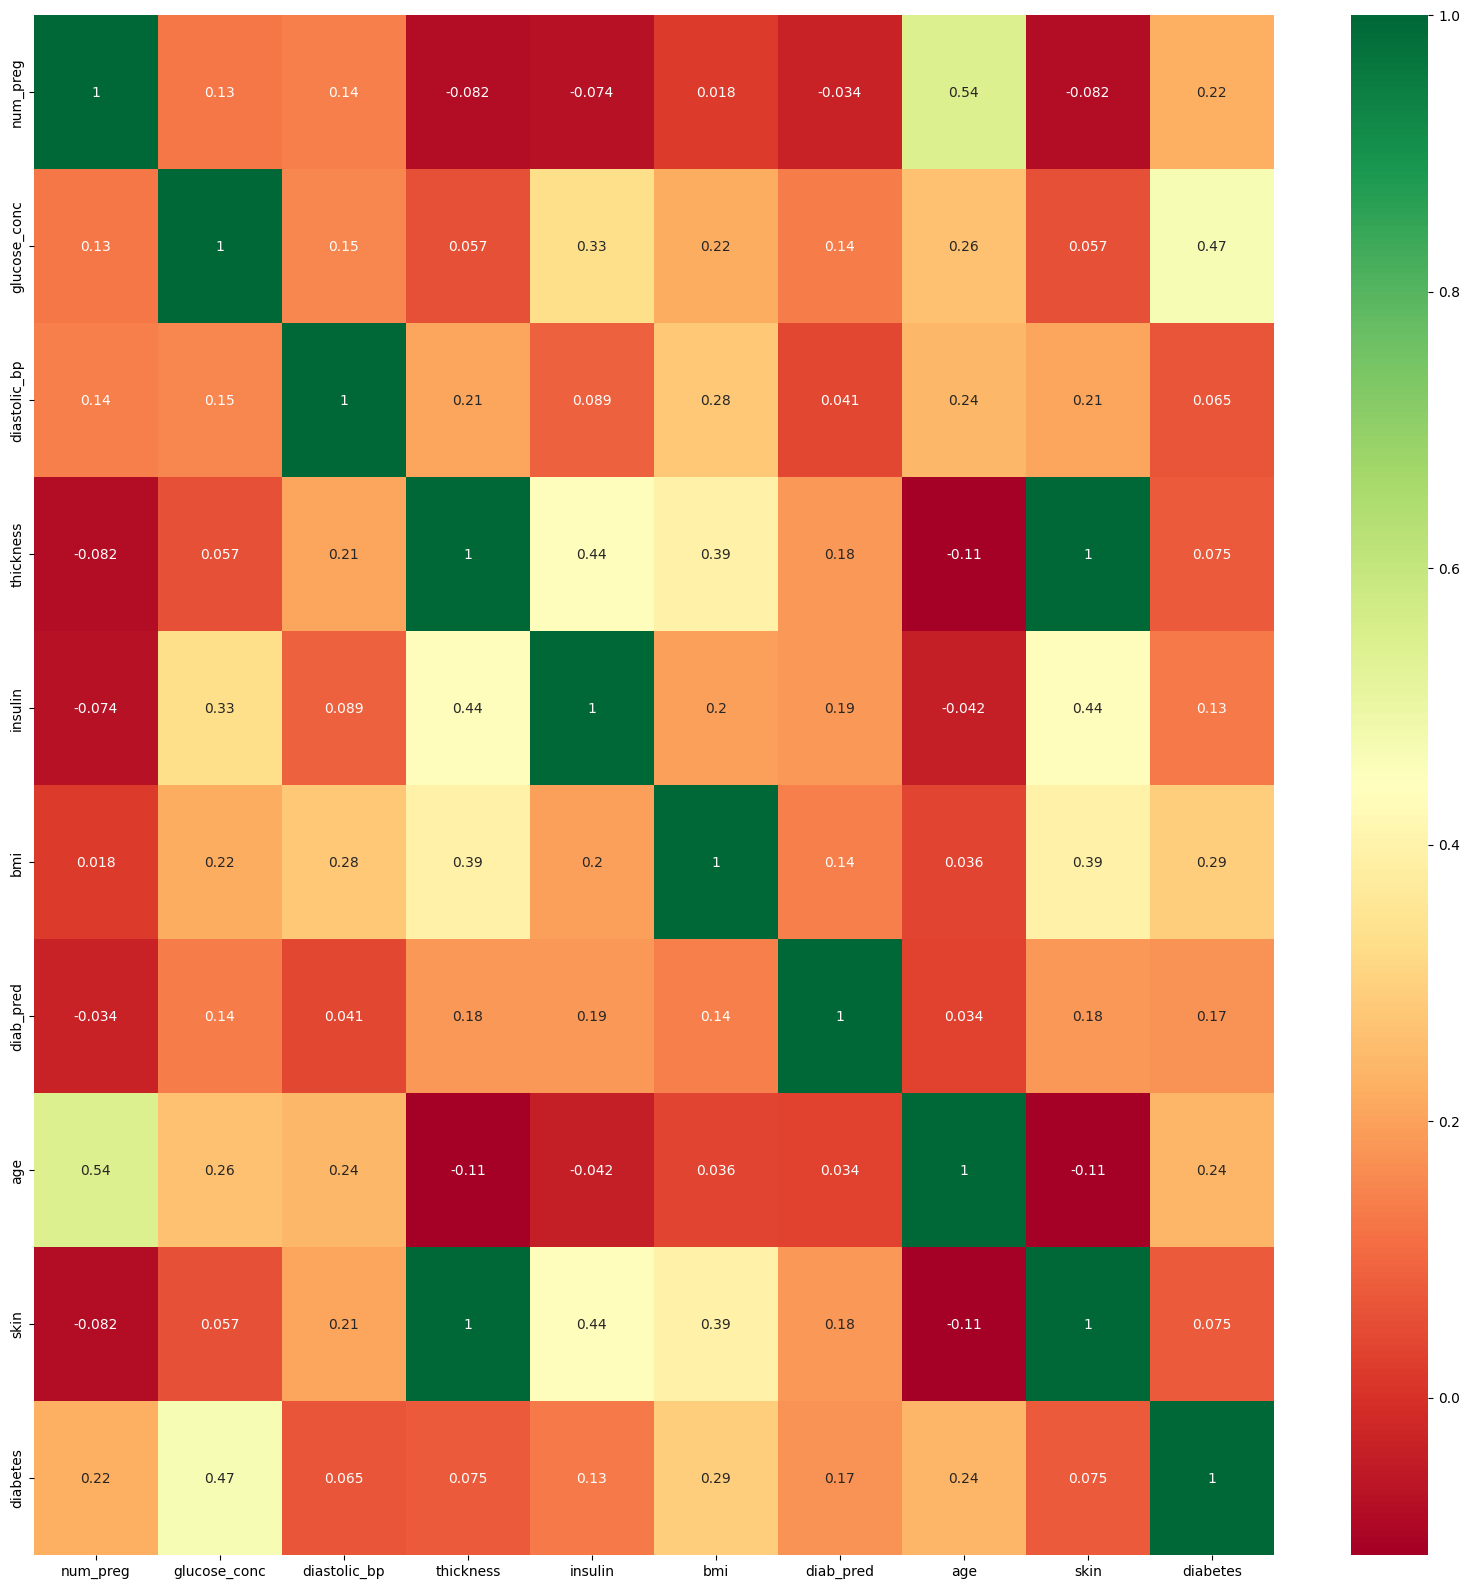

In [6]:
data.isnull().values.any()

## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [8]:
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [9]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [10]:
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [14]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")

# Fit and transform your data (assuming X_train is your dataset)
X_train = fill_values.fit_transform(X_train)


In [15]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [17]:
!pip install xgboost

You should consider upgrading via the 'c:\users\prasanna kumar\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [18]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
Accuracy = 0.719
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

Accuracy = 0.667


In [19]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

random_search.best_estimator_

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)
score

score.mean()
0.7410116199589883


Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 10.18 seconds.
[19:37:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:37:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:37:31] WARNING: C:/Users/administrator/workspace/xgboos

c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py", line 651, in score
    return accur

[19:37:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:37:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:37:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\users\prasanna kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py", line 651, in score
    return accur

0.7410116199589883

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB
Missing Values: num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64
Random Forest Accuracy: 0.7402597402597403
Confusion Matrix:
 [[120  31]
 [ 29  51]]
Classification Report:
  

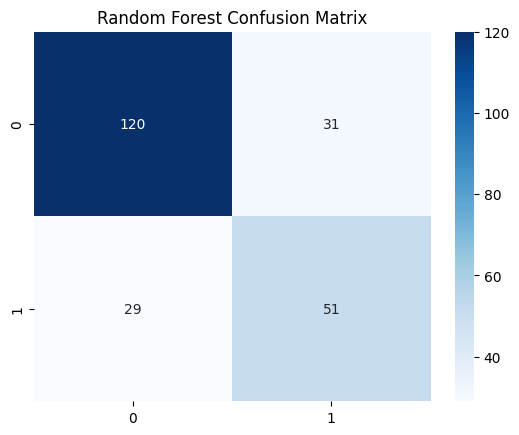

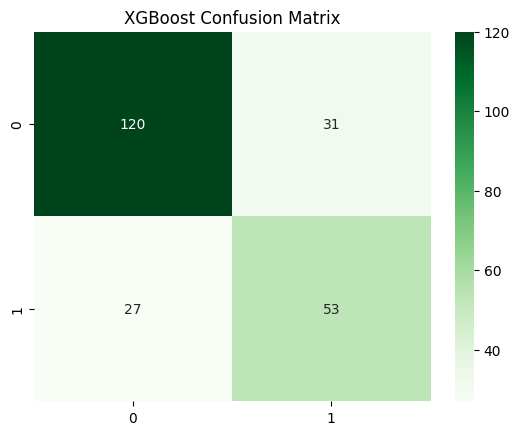

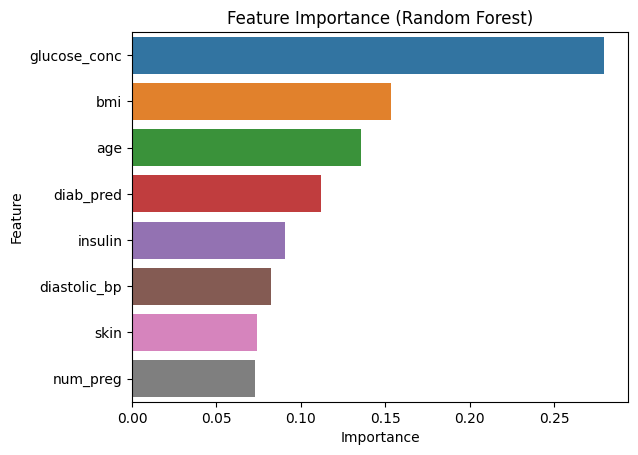

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Step 1: Load Dataset
data = pd.read_csv("pima-data.csv")

# Display dataset information
data.info()

# Step 2: Data Preprocessing
# Check for missing values
print("Missing Values:", data.isnull().sum())

# Handle missing values (replace 0s with mean in specific columns)
columns_to_impute = ['glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'skin']
for col in columns_to_impute:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

# Convert target variable to binary
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

# Step 3: Feature Selection
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
X = data[feature_columns]
y = data['diabetes']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Training
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 6: Evaluation
rf_predictions = random_forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Step 7: Hyperparameter Tuning with XGBoost
params = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 3, 5],
    "gamma": [0.0, 0.1, 0.2],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

xgb_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params, scoring='accuracy', n_iter=10, cv=3, random_state=42)

random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_

# Evaluate XGBoost Model
xgb_predictions = best_xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

# Step 8: Visualization
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature Importance Visualization (Random Forest)
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()
